# Event-based Lunar OPtical flow Egomotion estimation (ELOPE)
## Data Preparation
### Data Download

In [1]:
import os
import subprocess
import shutil
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
import cv2
import zipfile

from dataVisualization import LanderData

In [ ]:
zip_dataset_paths = ["files-archive", "elope_dataset.zip"]
dataset_path = "data/"

# Check if 'files-archive' exists
if not os.path.isfile(zip_dataset_paths[0]):
    subprocess.run(["zenodo_get", "15421707"], check=True)

# Check if 'elope_dataset.zip' exists
if not os.path.isfile(zip_dataset_paths[1]) and not os.listdir(dataset_path):
    if os.name == "posix":  # Linux
        subprocess.run(["unzip", zip_dataset_paths[0]], check=True)
    elif os.name == "nt":  # Windows
        extract_dir = os.path.dirname(zip_dataset_paths[0]) or "."
        # Rozpakuj ZIP
        with zipfile.ZipFile(zip_dataset_paths[0], 'r') as zip_ref:
            zip_ref.extractall(extract_dir)

os.makedirs(dataset_path, exist_ok=True)

if os.path.isfile(zip_dataset_paths[1]):
    shutil.move(zip_dataset_paths[1], os.path.join(dataset_path, zip_dataset_paths[1]))

# If 'elope_dataset.zip' exists, unzip it
if os.path.isfile(os.path.join(dataset_path, zip_dataset_paths[1])):
    if os.name == "posix":  # Linux
        subprocess.run(["unzip", os.path.join(dataset_path, zip_dataset_paths[1]), "-d", dataset_path], check=True)
    elif os.name == "nt":  # Windows
        zip_path = os.path.join(dataset_path, zip_dataset_paths[1])
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(dataset_path)
try:
    os.remove(os.path.join(dataset_path, zip_dataset_paths[1]))
except FileNotFoundError:
    print(zip_dataset_paths[1] + ": already deleted")

train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")

Loaded LanderData from: data/train/0003.npz
Events: 6635805 entries
Timestamps: 120 entries
Trajectory: 120 entries
IMU: 120 entries
Rangemeter: 477 entries


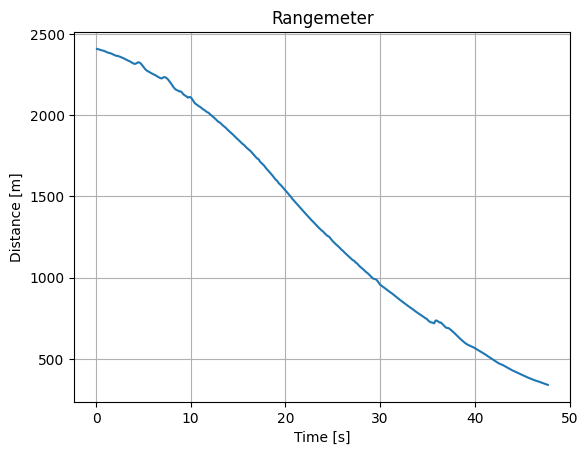

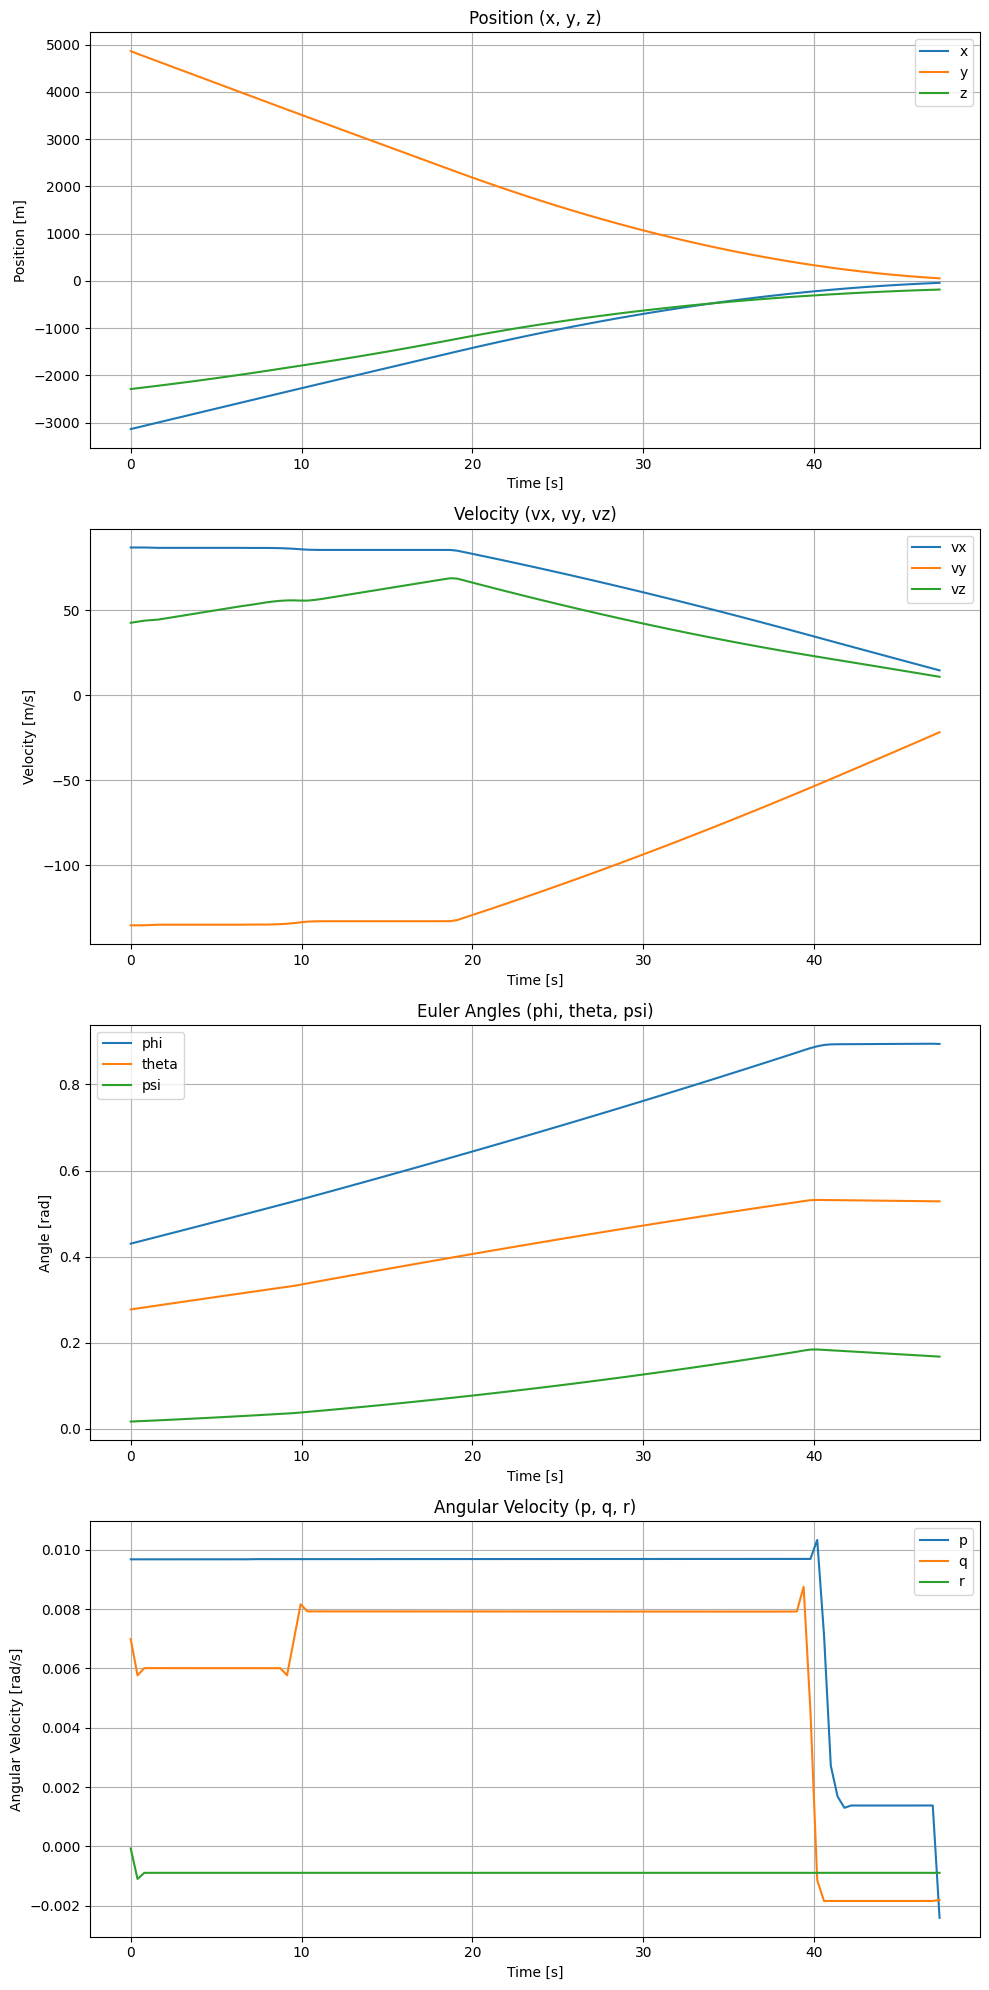

User exited with 'q'.

Displayed 11 event frames.


In [ ]:
landerData = LanderData("data/train/0003.npz",
                        filter_data=False, filter_t=1/100, filter_k=1, filter_size=5)
landerData.summary()
# landerData.plot_rangemeter()
landerData.plot_trajectory()
landerData.display_event_frames(tau=0.25, wait=100)

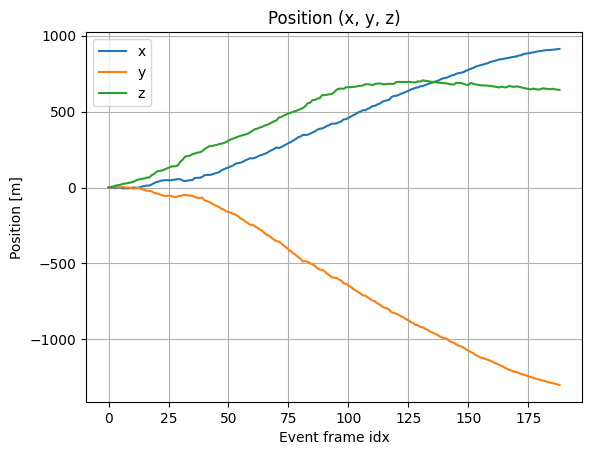

In [1]:
from trajEstimaton import TrajEstimator

estimator = TrajEstimator("data/train/0003.npz")
estimator.process_event_frames(tau=0.25)